In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Loading Foods Dataset
Loading the dataset and setting a new index.

In [2]:
db = json.load(open('foods-2011-10-03.json'))
df_groups = pd.DataFrame(db, columns=  ['group', 'manufacturer', 'id'] )
df_groups.set_index('id', inplace= True)
df_groups.rename_axis( 'NDB_No', inplace = True)
df_groups.head()                         
                         

,group,manufacturer
NDB_No,,
1008,Dairy and Egg Products,
1009,Dairy and Egg Products,
1018,Dairy and Egg Products,
1019,Dairy and Egg Products,
1028,Dairy and Egg Products,


# Joining 'USDA_Foods' data set
### USDA  Foods data sets contains various nutrient information about food manufactured in the USA.

In [3]:
foods = pd.read_excel('USDA_Foods.xlsx', index_col = 0)
foods.head()

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),...,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
NDB_No,,,,,,,,,,,,,,,,,,,,,
1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,...,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,...,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,...,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,...,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,...,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0


## Gathering important columns into groups

In [4]:
main_df = foods.join(df_groups, 'NDB_No')
main_df.head()
columns = main_df.columns
groups = main_df['group'].drop_duplicates()
nutritions_columns = ['Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',
       'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)',
       'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)']
g = ['Water_(g)','Protein_(g)', 'Lipid_Tot_(g)',
       'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)','FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)']
mg = ['Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)',
       'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Vit_C_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)','Choline_Tot_ (mg)','Vit_E_(mg)','Cholestrl_(mg)']
ug = ['Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)','Vit_K_(µg)', 'Vit_D_µg', 'Vit_D_IU', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)','Selenium_(µg)']
print(columns)
print(groups)

Index(['Shrt_Desc', 'Water_(g)', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)',
       'Ash_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)',
       'Calcium_(mg)', 'Iron_(mg)', 'Magnesium_(mg)', 'Phosphorus_(mg)',
       'Potassium_(mg)', 'Sodium_(mg)', 'Zinc_(mg)', 'Copper_mg)',
       'Manganese_(mg)', 'Selenium_(µg)', 'Vit_C_(mg)', 'Thiamin_(mg)',
       'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)',
       'Folate_Tot_(µg)', 'Folic_Acid_(µg)', 'Food_Folate_(µg)',
       'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU',
       'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)',
       'Beta_Crypt_(µg)', 'Lycopene_(µg)', 'Lut+Zea_ (µg)', 'Vit_E_(mg)',
       'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)', 'FA_Sat_(g)', 'FA_Mono_(g)',
       'FA_Poly_(g)', 'Cholestrl_(mg)', 'GmWt_1', 'GmWt_Desc1', 'GmWt_2',
       'GmWt_Desc2', 'Refuse_Pct', 'group', 'manufacturer'],
      dtype='object')
NDB_No
1001                                   

# Cleaning non values data
Replacing all NaN with 'unknown'

In [5]:
main_df.dropna(subset = ['group'], inplace = True)
main_df.manufacturer.fillna('unknown', inplace = True)
print(main_df.head())

              Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  Lipid_Tot_(g)  \
NDB_No                                                                       
1008     CHEESE,CARAWAY      39.28         376        25.18          29.20   
1009     CHEESE,CHEDDAR      37.02         404        22.87          33.31   
1018        CHEESE,EDAM      41.56         357        24.99          27.80   
1019        CHEESE,FETA      55.22         264        14.21          21.28   
1025    CHEESE,MONTEREY      41.01         373        24.48          30.28   

        Ash_(g)  Carbohydrt_(g)  Fiber_TD_(g)  Sugar_Tot_(g)  Calcium_(mg)  \
NDB_No                                                                       
1008       3.28            3.06           0.0            NaN         673.0   
1009       3.71            3.09           0.0           0.48         710.0   
1018       4.22            1.43           0.0           1.43         731.0   
1019       5.20            4.09           0.0           4.09   

## Standarized nutritions data 

In [6]:
def change_column_values(org_df, dst_df,col_name, multiplier):
    dst_df[col_name]= org_df[col_name] * multiplier
    
    
standard_df = main_df.copy()
for col in g:
    change_column_values(main_df,standard_df,col, 1000)
for col in ug:
    change_column_values(main_df,standard_df,col, 0.001)

    

## Show top values by given nutrient group and quantity

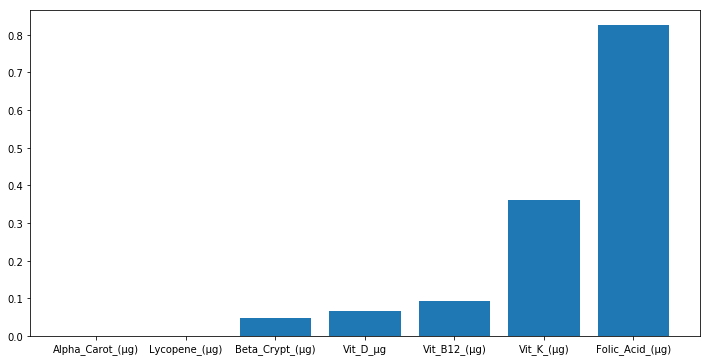

In [25]:
def nutrient_in_group(name, quant):
    group_type = standard_df['group'] == name
    nut_df = standard_df[group_type][nutritions_columns].sum().sort_values().head(quant)
    x = nut_df.index.tolist()
    y = nut_df.values.tolist()
    plt.figure(figsize=(12,6))
    plt.bar(x= x, height= y) 
    plt.show()
    
nutrient_in_group('Dairy and Egg Products', 7)

## Analysing top 7 manufacturer according to water amount in processed foods

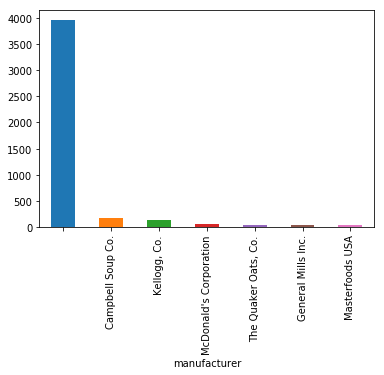

In [8]:

manufacturer_count = main_df.groupby('manufacturer').count().sort_values( 'Water_(g)',ascending= False)
manufacturer_count = manufacturer_count.drop(index = 'unknown')
manufacturer_count.head(7).plot(y= 'Water_(g)', kind='bar', legend = False)




## Filling missing manufacturer data with unknown values


In [9]:
main_df.manufacturer.replace({'': 'unknown'}, inplace = True)


# Counting number of products per manufacturer

In [10]:

print(main_df.manufacturer.value_counts())


unknown                                 5322
Campbell Soup Co.                        182
Kellogg, Co.                             138
McDonald's Corporation                    60
The Quaker Oats, Co.                      52
General Mills Inc.                        42
Masterfoods USA                           38
Hershey Food Corp.                        32
WhiteWave Foods Company                   28
Kentucky Fried Chicken                    22
Good Humor - Breyers Ice Cream            22
Malt-O-Meal, Co.                          19
Kraft Foods, Inc.                         19
Archway Cookies                           17
Nestle USA, Inc.                          16
Burger King Corporation                   15
Popeyes Chicken and Biscuits              13
Pizza Hut, Inc.                           12
Taco Bell Corp.                           11
Wendy's International, Inc.               11
Pillsbury Co.                              7
T.G.I Friday's                             6
Domino's P

## Creating a function that shows top 3 manufacturer for a given nutrient value

In [11]:

def nutritiont_manufacturer(nutriont):
    manu_df = main_df.groupby('manufacturer')
    mean_nut = manu_df[nutriont].mean()
    mean_nut = mean_nut.drop(index = 'unknown')
    return mean_nut.sort_values(ascending = False).head(3)

nutritiont_manufacturer('Protein_(g)')


manufacturer
LUNA BAR                  20.750000
Kentucky Fried Chicken    20.226364
Hormel Foods Corp.        19.860000
Name: Protein_(g), dtype: float64

## Finding which vitamin has the maximum amount accros all vitamins

In [12]:
vitamins = ['Vit_C_(mg)', 'Thiamin_(mg)', 'Riboflavin_(mg)', 'Niacin_(mg)', 'Panto_Acid_mg)', 'Vit_B6_(mg)','Folate_Tot_(µg)', 
            'Folic_Acid_(µg)', 'Food_Folate_(µg)', 'Folate_DFE_(µg)', 'Choline_Tot_ (mg)', 'Vit_B12_(µg)', 'Vit_A_IU', 
            'Vit_A_RAE', 'Retinol_(µg)', 'Alpha_Carot_(µg)', 'Beta_Carot_(µg)', 'Beta_Crypt_(µg)', 'Lycopene_(µg)', 
            'Lut+Zea_ (µg)', 'Vit_E_(mg)', 'Vit_D_µg', 'Vit_D_IU', 'Vit_K_(µg)']
print(pd.concat([main_df[vitamins].idxmax().apply(lambda x: main_df.loc[x]['Shrt_Desc']), main_df[vitamins].max()], axis=1, keys=['Name', 'Max Value'])

)
      

                                                                Name  \
Vit_C_(mg)         BEVERAGES,ORANGE-FLAVOR DRK,BRKFST TYPE,LO CAL...   
Thiamin_(mg)                                    YEAST EXTRACT SPREAD   
Riboflavin_(mg)                                 YEAST EXTRACT SPREAD   
Niacin_(mg)                                     YEAST EXTRACT SPREAD   
Panto_Acid_mg)     CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN COMPLET...   
Vit_B6_(mg)          CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN ORIGINAL   
Folate_Tot_(µg)                                 YEAST EXTRACT SPREAD   
Folic_Acid_(µg)                                 YEAST EXTRACT SPREAD   
Food_Folate_(µg)           LEAVENING AGENTS,YEAST,BAKER'S,ACTIVE DRY   
Folate_DFE_(µg)                                 YEAST EXTRACT SPREAD   
Choline_Tot_ (mg)      BEEF,VAR MEATS&BY-PRODUCTS,KIDNEYS,CKD,SIMMRD   
Vit_B12_(µg)                              CLAM,MXD SP,CKD,MOIST HEAT   
Vit_A_IU                                          FISH OIL,COD L

## For each group finding the foods that have lowest calories count

In [13]:
print(main_df.loc[main_df.groupby('group')['Energ_Kcal'].idxmin()][['Shrt_Desc','group','Energ_Kcal']])

                                                Shrt_Desc  \
NDB_No                                                      
43075   FLUID REPLCMNT,ELECTROLYTE SOLN (INCLUDE PEDIA...   
18372                        LEAVENING AGENTS,BAKING SODA   
13341                BEEF,VAR MEATS&BY-PRODUCTS,TRIPE,RAW   
14121                            BEVERAGES,CARB,CLUB SODA   
8236              CEREALS,QKR,OAT BRAN,PREP W/H2O,NO SALT   
20034                                     OAT BRAN,COOKED   
1085    MILK,NONFAT,FLUID,W/ ADDED VIT A & VIT D (FAT ...   
35078   TEA,TUNDRA,HERB & LABORADOR COMBINATION (ALASK...   
21379                               MCDONALD'S,SIDE SALAD   
43019                                SALAD DRSNG,SWT&SOUR   
15162                                 CLAM,MXD SP,CND,LIQ   
9153                      LEMON JUC FROM CONC,CND OR BTLD   
17207                VEAL,VAR MEATS&BY-PRODUCTS,LUNGS,RAW   
16230   SOYMILK (ALL FLAVORS),NONFAT,W/ ADDED CA,VITAM...   
22931         CAMPBELL'S

## Show sum of a given nutrient for each group and selecting the groups that has the lowest values for that nutrient

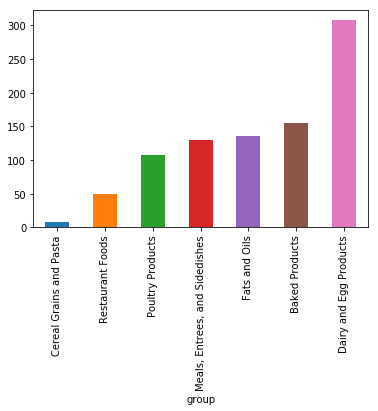

In [14]:
def nutrient_in_group(name, quant):
    (main_df.groupby('group')[name].sum()).sort_values().head(quant).plot(kind='bar')
nutrient_in_group('Vit_C_(mg)',7)
    
    